# Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
# import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# load data set and examine

housing = pd.read_csv('train.csv', na_values="NAN")

In [4]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.shape

(1460, 81)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning and Preparation

#### Imputing Null Values

There are few columns where null value actually has a meaning to it. We will replace those null values with None

In [7]:
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
meaningful_null_valued_cols = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

print('There are {0} columns with meaningful null values which could be replaced with "None"'.format(len(meaningful_null_valued_cols)))

There are 14 columns with meaningful null values which could be replaced with "None"


In [9]:
for i in meaningful_null_valued_cols:
    housing[i].fillna('None', inplace=True)

In [10]:
housing['GarageFinish'].value_counts(dropna=False)

Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64

In [11]:
print('Let us look at the columns {0} for handling null values'.format(list(housing.columns[housing.isnull().any()])))

Let us look at the columns ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt'] for handling null values


In [12]:
for i in list(housing.columns[housing.isnull().any()]):
    print('Number of missing values for column {0} is {1}'.format(i,housing[i].isnull().sum()))

Number of missing values for column LotFrontage is 259
Number of missing values for column MasVnrType is 8
Number of missing values for column MasVnrArea is 8
Number of missing values for column Electrical is 1
Number of missing values for column GarageYrBlt is 81


Columns Electrical, MasVnrType, MasVnrArea are having less than 1% of missing values. Hence we will remove those rows.

In [13]:
housing.dropna(subset=['MasVnrType', 'MasVnrArea', 'Electrical'], inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1194 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   Alley          1451 non-null   object 
 7   LotShape       1451 non-null   object 
 8   LandContour    1451 non-null   object 
 9   Utilities      1451 non-null   object 
 10  LotConfig      1451 non-null   object 
 11  LandSlope      1451 non-null   object 
 12  Neighborhood   1451 non-null   object 
 13  Condition1     1451 non-null   object 
 14  Condition2     1451 non-null   object 
 15  BldgType       1451 non-null   object 
 16  HouseStyle     1451 non-null   object 
 17  OverallQual    1451 non-null   int64  
 18  OverallC

In [14]:
housing.shape

(1451, 81)

In [15]:
# LotFrontage

housing['LotFrontage'].isnull().sum()

257

In [16]:
# datatype of column

housing['LotFrontage'].dtype

dtype('float64')

In [17]:
housing['LotFrontage'].describe()

count    1194.000000
mean       70.027638
std        24.299302
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

We can clearly see that there are outliers for this column.

We will try to impute the missing values with mean or median

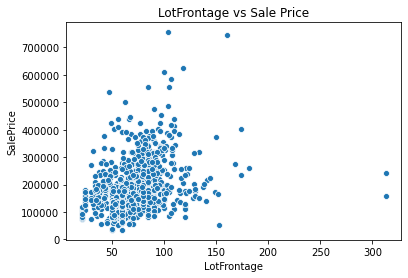

In [18]:
sns.scatterplot(housing['LotFrontage'], housing['SalePrice'])
plt.title('LotFrontage vs Sale Price')
plt.show()

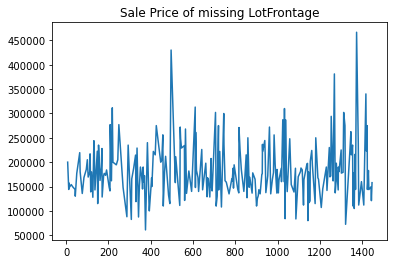

In [19]:
plt.plot(housing.loc[pd.isnull(housing['LotFrontage'])]['SalePrice'])
plt.title('Sale Price of missing LotFrontage')
plt.show()

We can clearly see below things from the above 2 plots:
1. The range of sale price for the data points where LotFrontage is missing lies betwee 50000 to 450000
2. Majority of the datapoints with Sale price less than 450000 have LotFrontage between 50-100.


In [20]:
housing['LotFrontage'].mean()

70.02763819095478

In [21]:
housing['LotFrontage'].median()

69.0

We will impute the missing values with mean here as mean and median are almost the same.

In [22]:
housing['LotFrontage'] = np.where(pd.isnull(housing['LotFrontage']), housing['LotFrontage'].mean(), housing['LotFrontage'])

In [23]:
housing['LotFrontage'].isnull().sum()

0

In [24]:
housing['LotFrontage'].describe()

count    1451.000000
mean       70.027638
std        22.040935
min        21.000000
25%        60.000000
50%        70.027638
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [25]:
# GarageYrBlt column
housing['GarageYrBlt'].isnull().sum()

81

In [26]:
housing.loc[pd.isnull(housing['GarageYrBlt'])]['GarageType'].value_counts()

None    81
Name: GarageType, dtype: int64

From the above we can see that for the data points where the GarageYrBlt is not present there is no Garage at all. Hence we will impute the values as 0.

In [27]:
housing['GarageYrBlt'] = np.where(pd.isnull(housing['GarageYrBlt']), 0, housing['GarageYrBlt'])

In [28]:
housing['GarageYrBlt'].isnull().sum()

0

Let us perform some EDA now

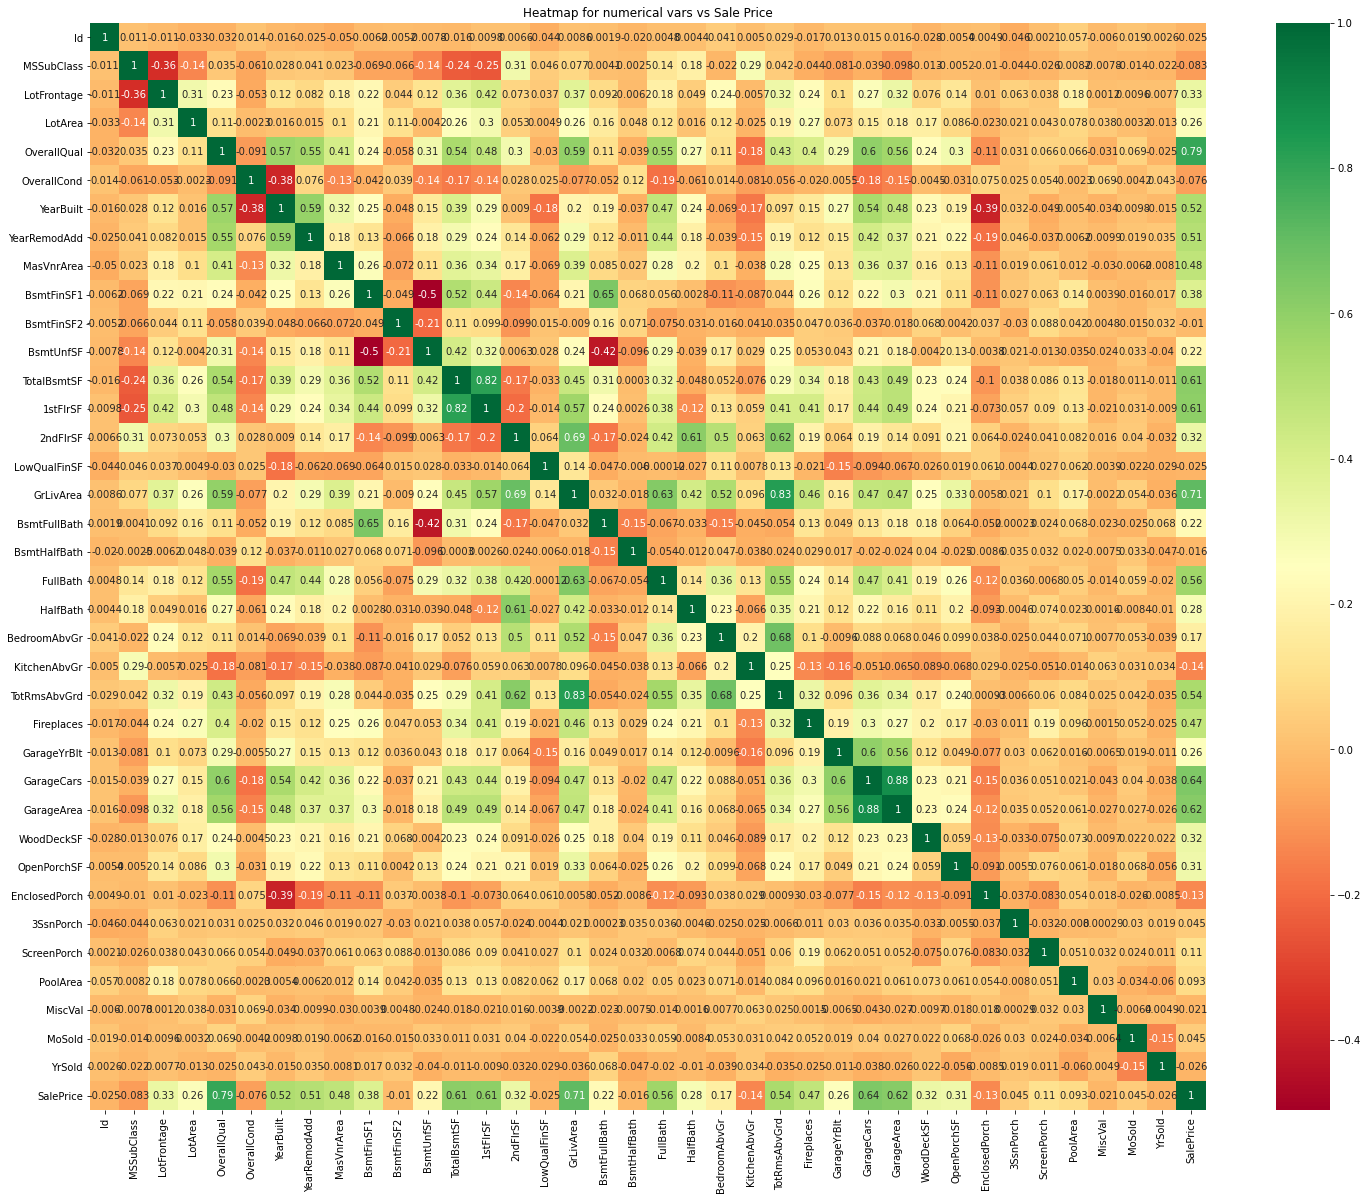

In [29]:
plt.figure(figsize=(25,20))

sns.heatmap(housing.corr(), cmap='RdYlGn', annot=True)
plt.title('Heatmap for numerical vars vs Sale Price')
plt.show()

From the above correlation matrix we can see that the Sale Price is having a good correlation with below vars:

OverallQual, YearBuilt, MasVnrArea, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea

As the values in the above vars increase the sales price also increase.

Also the Sales price has negative correlation with OverallCond, BsmtFinSF2, LowQualFinSF2, BsmntHallBath, KitchenAbvGr, EnclosedPorch

There are few features which have almost no correlation with Sale Price as below:
   Id(obviously), BsmntFinSF2, LowQualFinSF, BsmntHalfBath, 3SsnPorch, MiscVal.
   Hence we will remove these columns from the dataset.

In [30]:
# dropping the non related columns to SalePrice

housing.drop(['Id','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','3SsnPorch','MiscVal'], axis=1, inplace=True)

In [31]:
len(housing.columns)

75

In [32]:
# PoolArea and MiscFeature

housing['PoolArea'].value_counts()

0      1444
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [33]:
housing['MiscFeature'].value_counts()

None    1397
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

As there are large data points where Alley, Fence, Pool and MiscFeature is not present, we will remove PoolQC, PoolArea, MiscVal and MiscFeature. MiscVal is already removed. Hence we will remove the other three

In [34]:
housing.drop(['Alley','Fence', 'PoolQC','PoolArea','MiscFeature'], axis=1, inplace=True)

In [35]:
len(housing.columns)

70

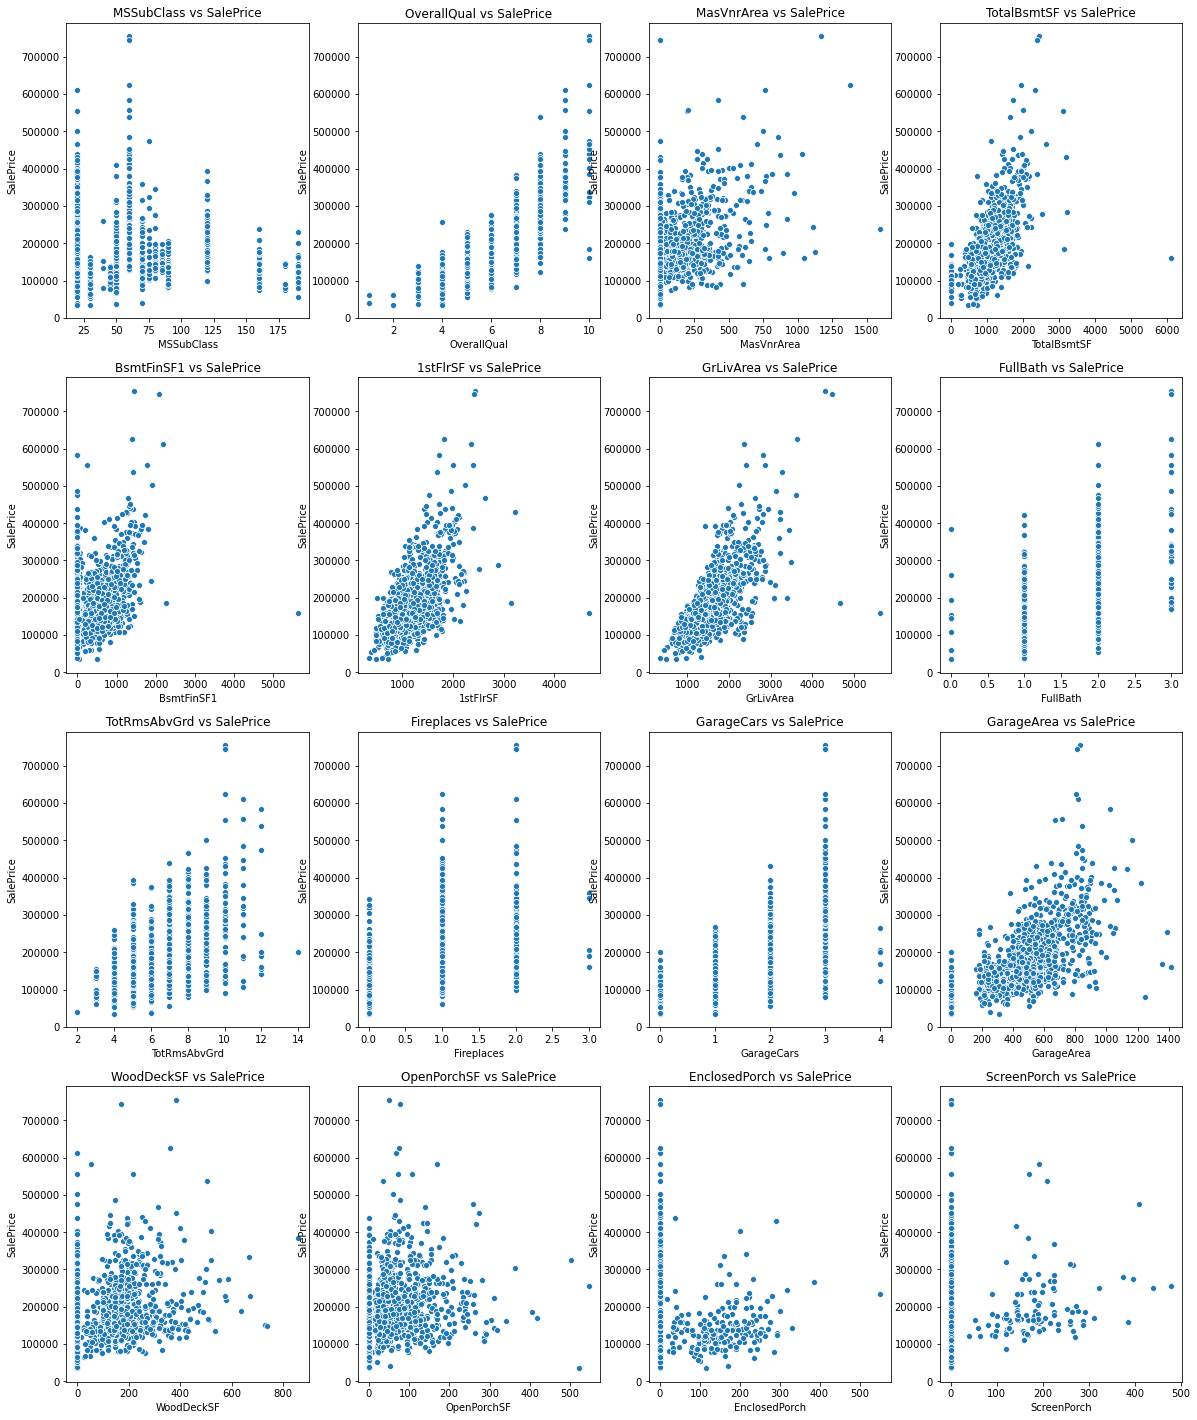

In [36]:
# plot the scatter plot for numeric columns
numeric_cols = ['MSSubClass','OverallQual','MasVnrArea','TotalBsmtSF','BsmtFinSF1','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea', 'WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch']

plt.figure(figsize=(20,25))
for i,k in enumerate(numeric_cols):
    plt.subplot(4,4,i+1)
    sns.scatterplot(housing[k], housing['SalePrice'])
    plt.title('{0} vs SalePrice'.format(k))

plt.show()

As visualized above we can see the positive correlation with most of numeric vars

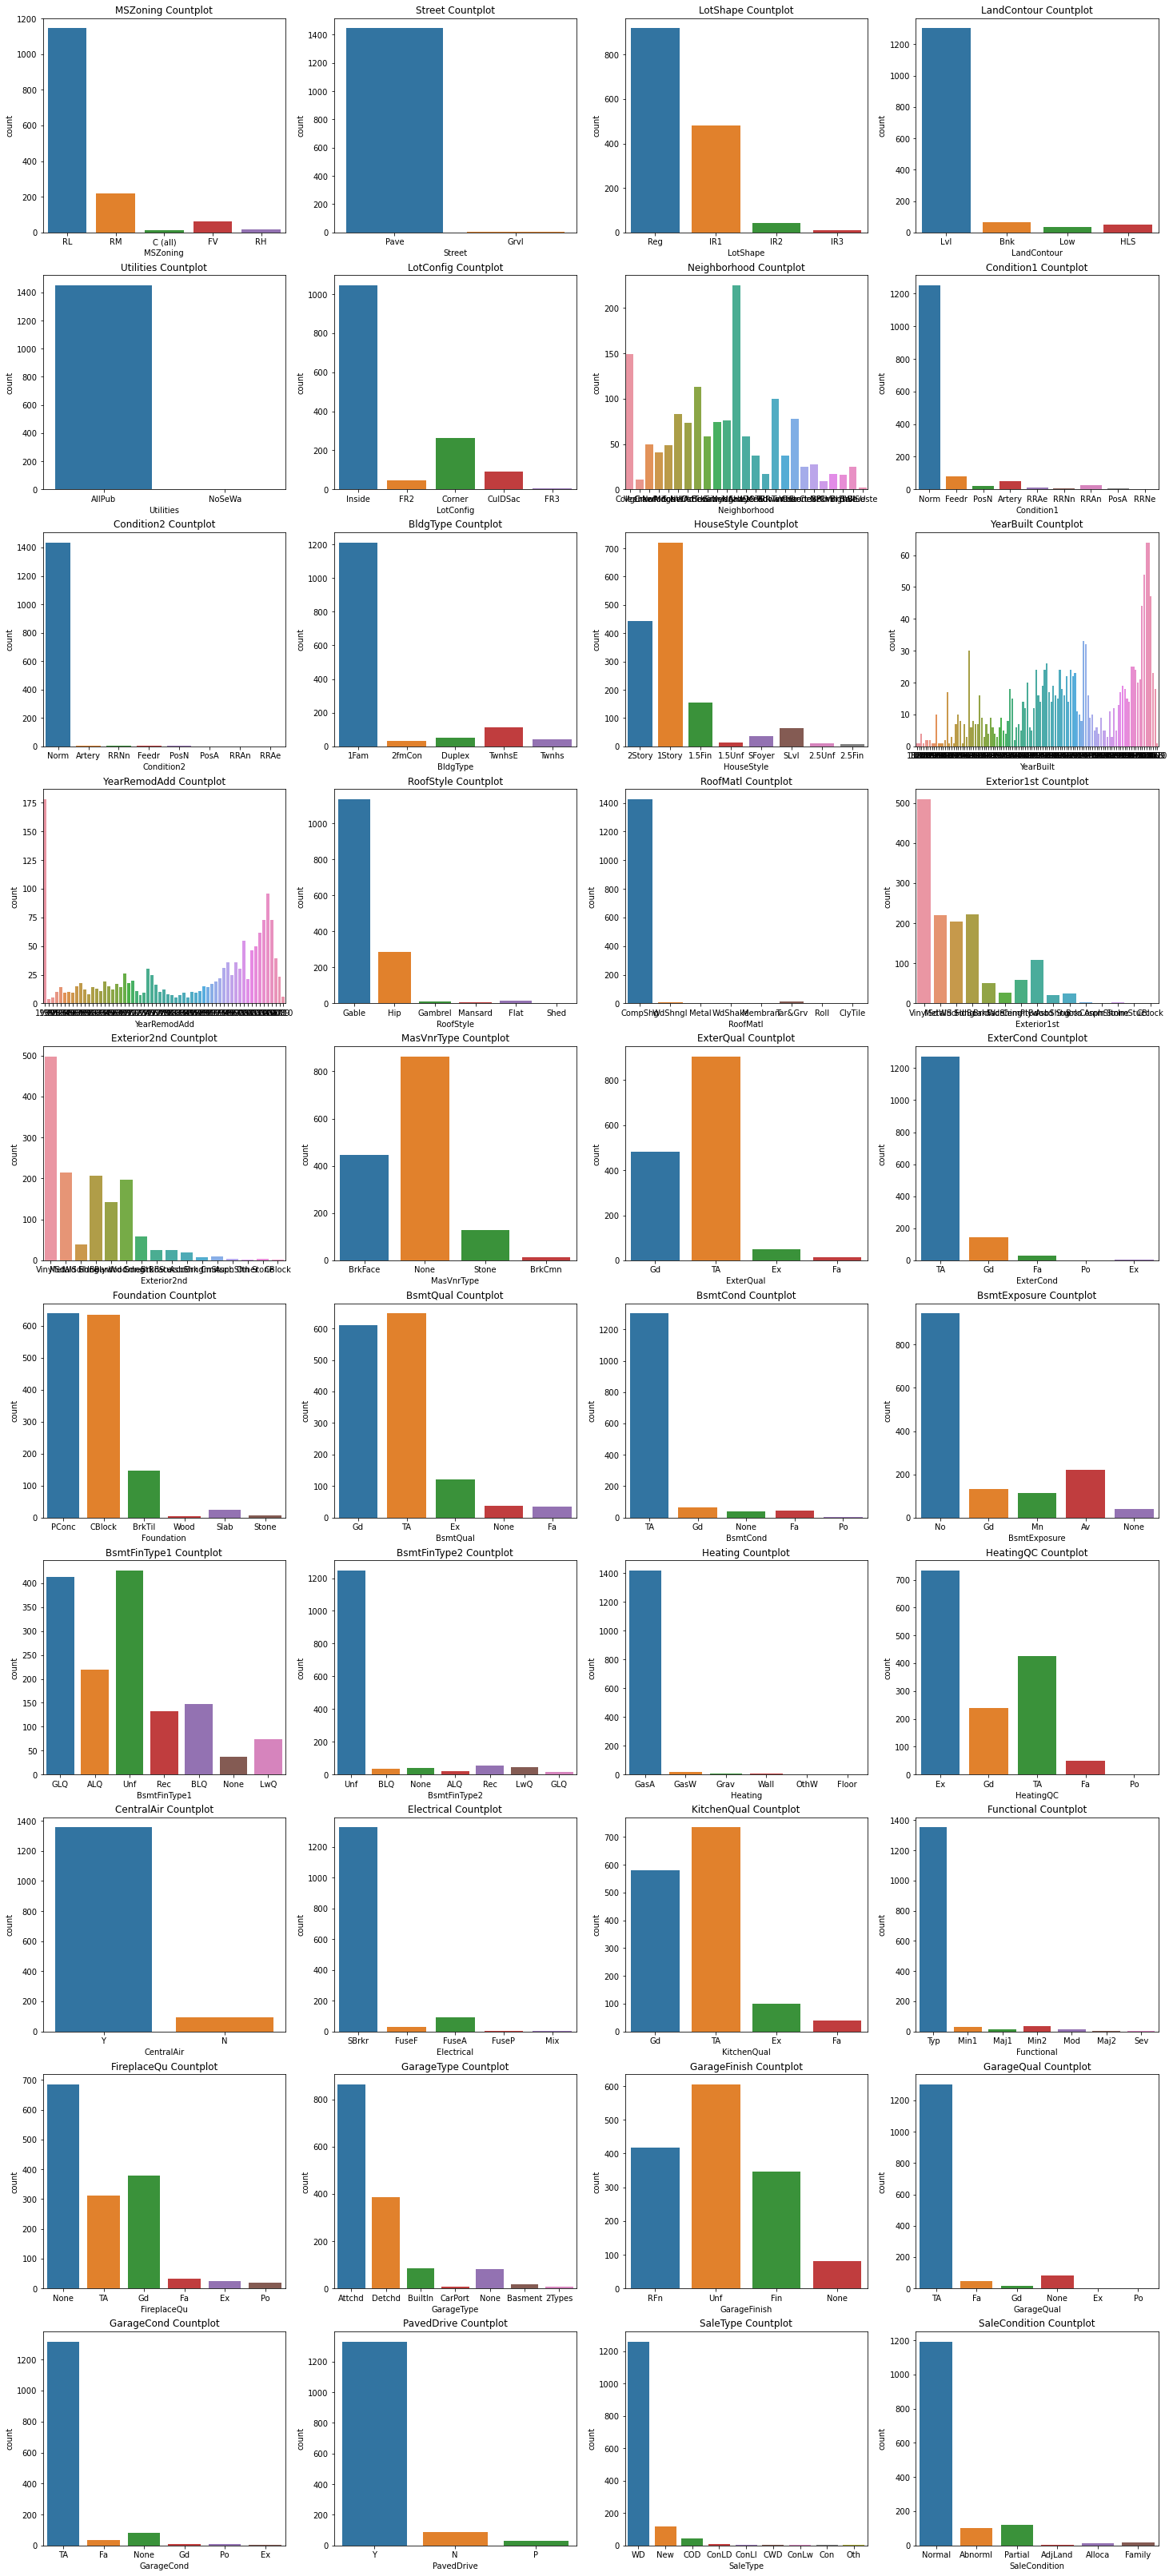

In [37]:
# plotting count plots for categorical variables 1

categorical_vars = ['MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

plt.figure(figsize=(25,70))
for i,k in enumerate(categorical_vars):
    plt.subplot(12,4,i+1)
    sns.countplot(housing[k])
    plt.title('{0} Countplot'.format(k))

plt.show()

Below columns are having more than 85% values of same category. Hence we will remove those columns.
- Street, utilities, Condition2, RoofMatl, Heating, Functional

In [38]:
remove_cols = ['Street','Utilities','Condition2','RoofMatl','Heating','Functional']
housing.drop(remove_cols, axis=1, inplace=True)


In [39]:
[categorical_vars.remove(i) for i in remove_cols]
len(housing.columns), len(categorical_vars)

(64, 34)

There are 4 year columns in the data. 
We will convert them to age by subtracting the year from 2020

In [40]:
# Handling Year Columns

year_columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
housing[year_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     1451 non-null   int64  
 1   YearRemodAdd  1451 non-null   int64  
 2   GarageYrBlt   1451 non-null   float64
 3   YrSold        1451 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 96.7 KB


In [41]:
for i in year_columns:
    housing[i] = housing[i].apply(lambda x: 2020-x if x>0 else x)
    housing[i] = housing[i].astype(int)

In [42]:
housing[year_columns].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,17,17,17,12
1,44,44,44,13
2,19,18,19,12
3,105,50,22,14
4,20,20,20,12


In [43]:
# Correlation for year columns vs Sale Price
year_columns.append('SalePrice')
round(housing[year_columns].corr(),2)


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,SalePrice
YearBuilt,1.00,0.59,0.64,-0.01,-0.52
YearRemodAdd,0.59,1.00,0.53,0.04,-0.51
GarageYrBlt,0.64,0.53,1.00,0.00,-0.35
YrSold,-0.01,0.04,0.00,1.00,0.03
SalePrice,-0.52,-0.51,-0.35,0.03,1.00


We can see YrSold has very less correlation. Hence we can remove that variable/feature.

In [44]:
housing.drop(['YrSold'], axis=1, inplace=True)
year_columns.remove('YrSold')

#removing sale price also to avoid confusion
year_columns.remove('SalePrice')

In [45]:
len(housing.columns)

63

#### Check for Outliers in numeric vars

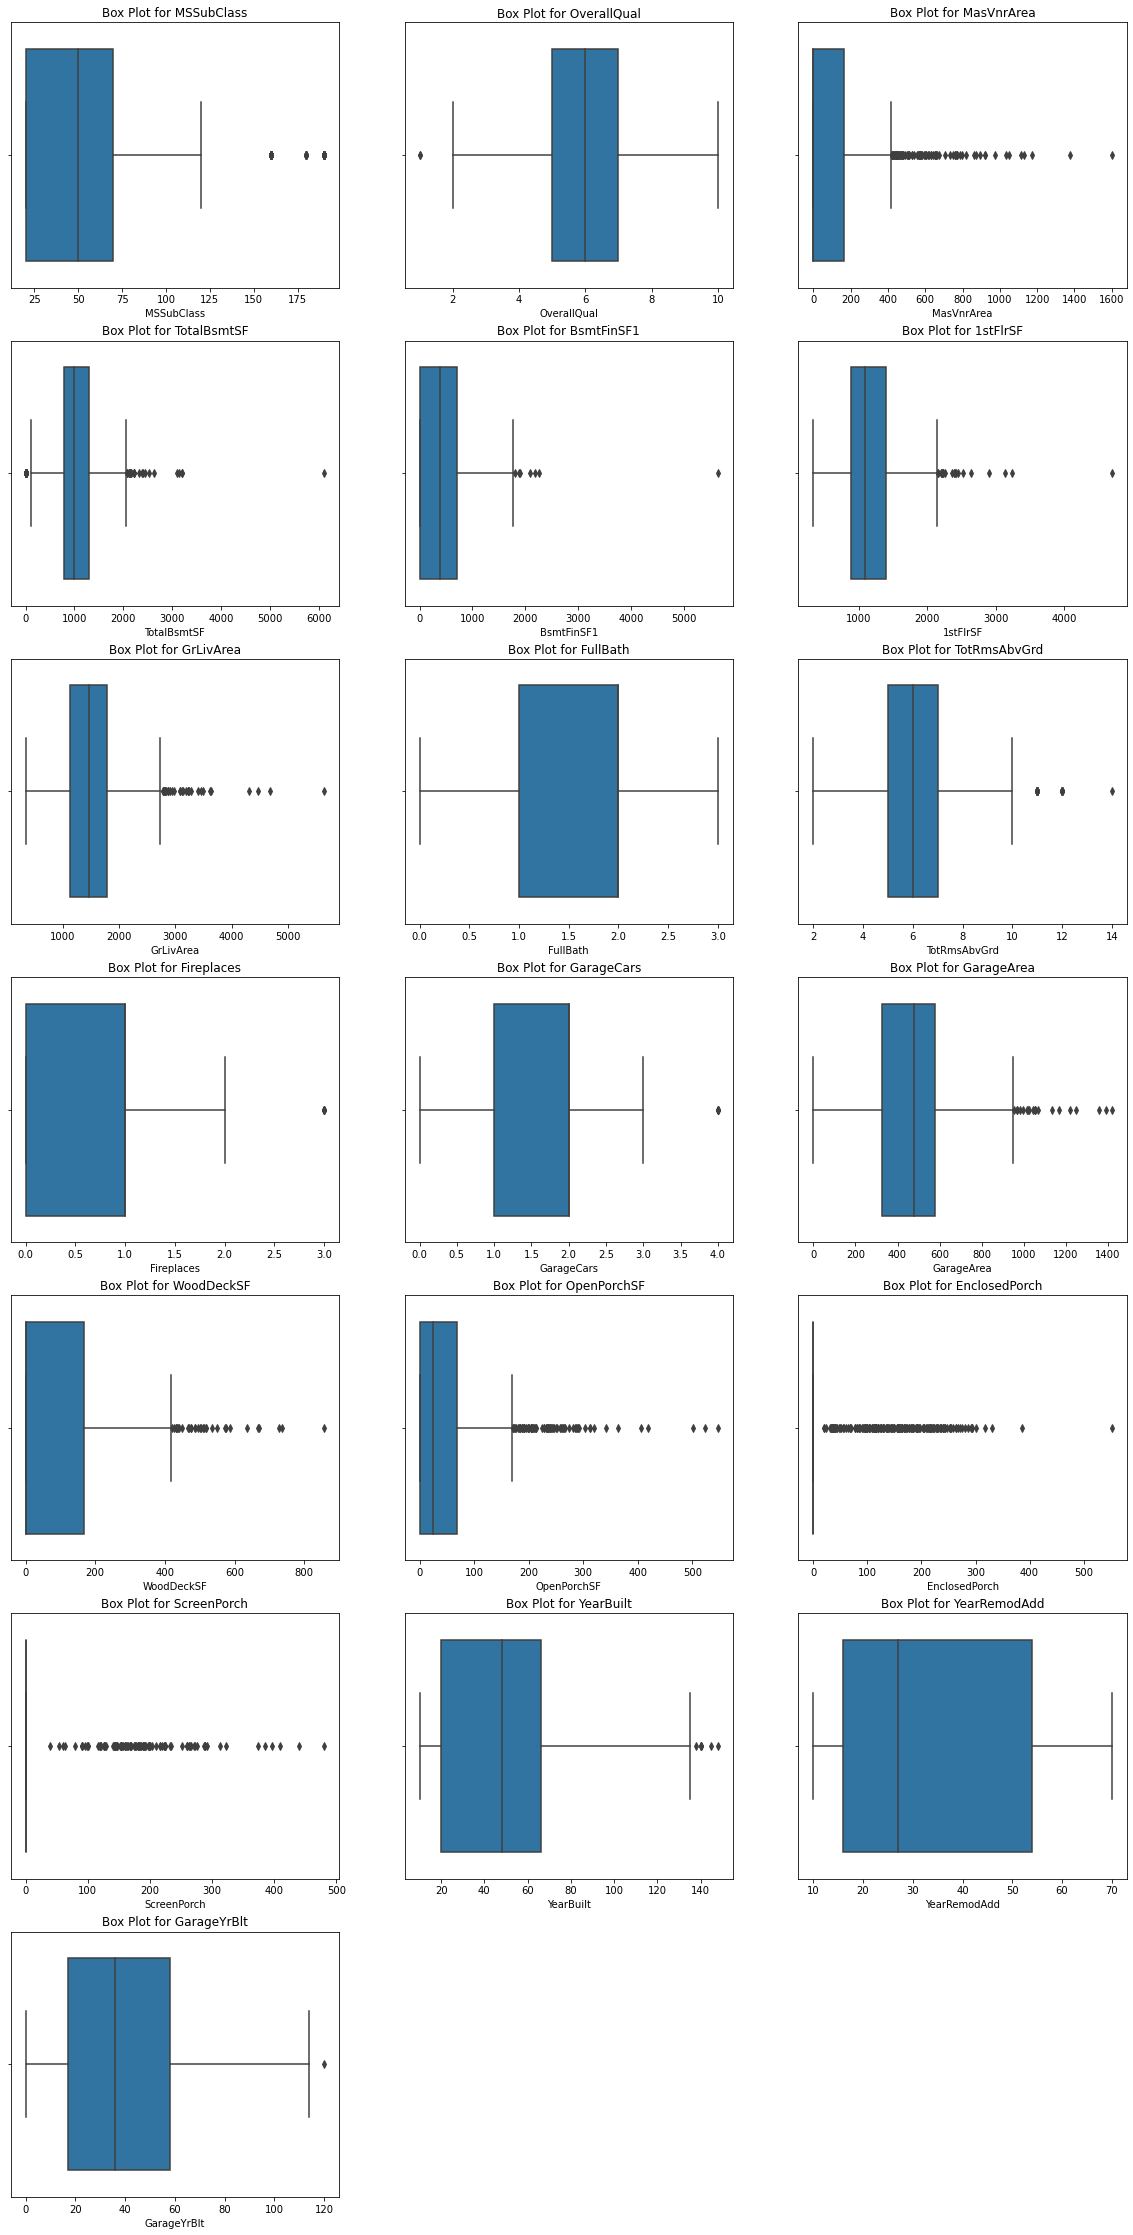

In [46]:
plt.figure(figsize=(20,40))
for i,k in enumerate(numeric_cols+year_columns):
    plt.subplot(7,3,i+1)
    sns.boxplot(housing[k])
    plt.title('Box Plot for {0}'.format(k))

plt.show()

We can see the box plot for various numeric categories here.

We have outliers for MSSubClass, OverallQual, MasVnrArea, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch, YearBuilt, GarageYrBlt

As mentioned by the tutor in the video session, currently we are not handling outliers for numerical vars.

#### Creating Dummy Variables for all categorical columns

Let us identify the columns that are categorical and Ordinal and try to encode them

In [47]:
ordinal_cols = ['LotShape','LandSlope','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                 'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond']

order_for_cols = {
    'LotShape':{'Reg':0,'IR1':1,'IR2':2,'IR3':3},
    
    'LandSlope':{'Gtl':0,'Mod':1,'Sev':2},
    
    'HouseStyle':{'1Story':0,'1.5Fin':1,'1.5Unf':2,'2Story':3,'2.5Fin':4,'2.5Unf':5,'SFoyer':6,'SLvl':7},
    
    'ExterQual':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    
    'ExterCond':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    
    'BsmtQual':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    
    'BsmtCond':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    
    'BsmtExposure':{'None':0,'No':1,'Mn':2,'Av':3,'Gd':4},
    
    'BsmtFinType1':{'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
    
    'BsmtFinType2':{'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
    
    'HeatingQC':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    
    'KitchenQual':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    
    'FireplaceQu':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    
    'GarageFinish':{'None':0,'Unf':1,'RFn':2,'Fin':3},
    
    'GarageQual':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    
    'GarageCond':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
    }

In [48]:
len(order_for_cols)

16

In [49]:
len(ordinal_cols)

16

In [50]:
for i, k in order_for_cols.items():
    housing[i] = housing[i].map(k)


In [51]:
housing[ordinal_cols].head()

,LotShape,LandSlope,HouseStyle,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond
0,0,0,3,3,2,4,3,1,6,1,4,3,0,2,3,3
1,0,0,0,2,2,4,3,4,5,1,4,2,3,2,3,3
2,1,0,3,3,2,4,3,2,6,1,4,3,3,2,3,3
3,1,0,3,2,2,3,4,1,5,1,3,3,4,1,3,3
4,1,0,3,3,2,4,3,3,6,1,4,3,3,2,3,3


In [52]:
#Plot the correlation against Sale Price for all the label encoded columns and remove the less influential ones

corr_cols = ordinal_cols+['SalePrice']
corr_df = pd.DataFrame(housing[corr_cols].corr()['SalePrice']).T
remove_cols = [i for i in corr_df.columns if -0.05 < corr_df[i].values[0] < 0.05]
remove_cols

['ExterCond', 'BsmtFinType2']

In [53]:
housing.drop(remove_cols, axis=1, inplace=True)
[categorical_vars.remove(i) for i in remove_cols]

[None, None]

In [54]:
len(housing.columns)

61

In [55]:
len(categorical_vars)

32

Let us look into other categorical columns

In [56]:
# remaining categorical variables
remaining_cat_vars = [i for i in categorical_vars if i not in ordinal_cols]

In [57]:
print(remaining_cat_vars)

['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']


In [58]:
len(remaining_cat_vars)

19

In [59]:
def annotate_bar_graph(ax):
    for p in ax.patches:
        height = np.nan_to_num(p.get_height(), nan=0)
        ax.annotate('{0}'.format(round(float(str(height)),2)), (p.get_x(), height))

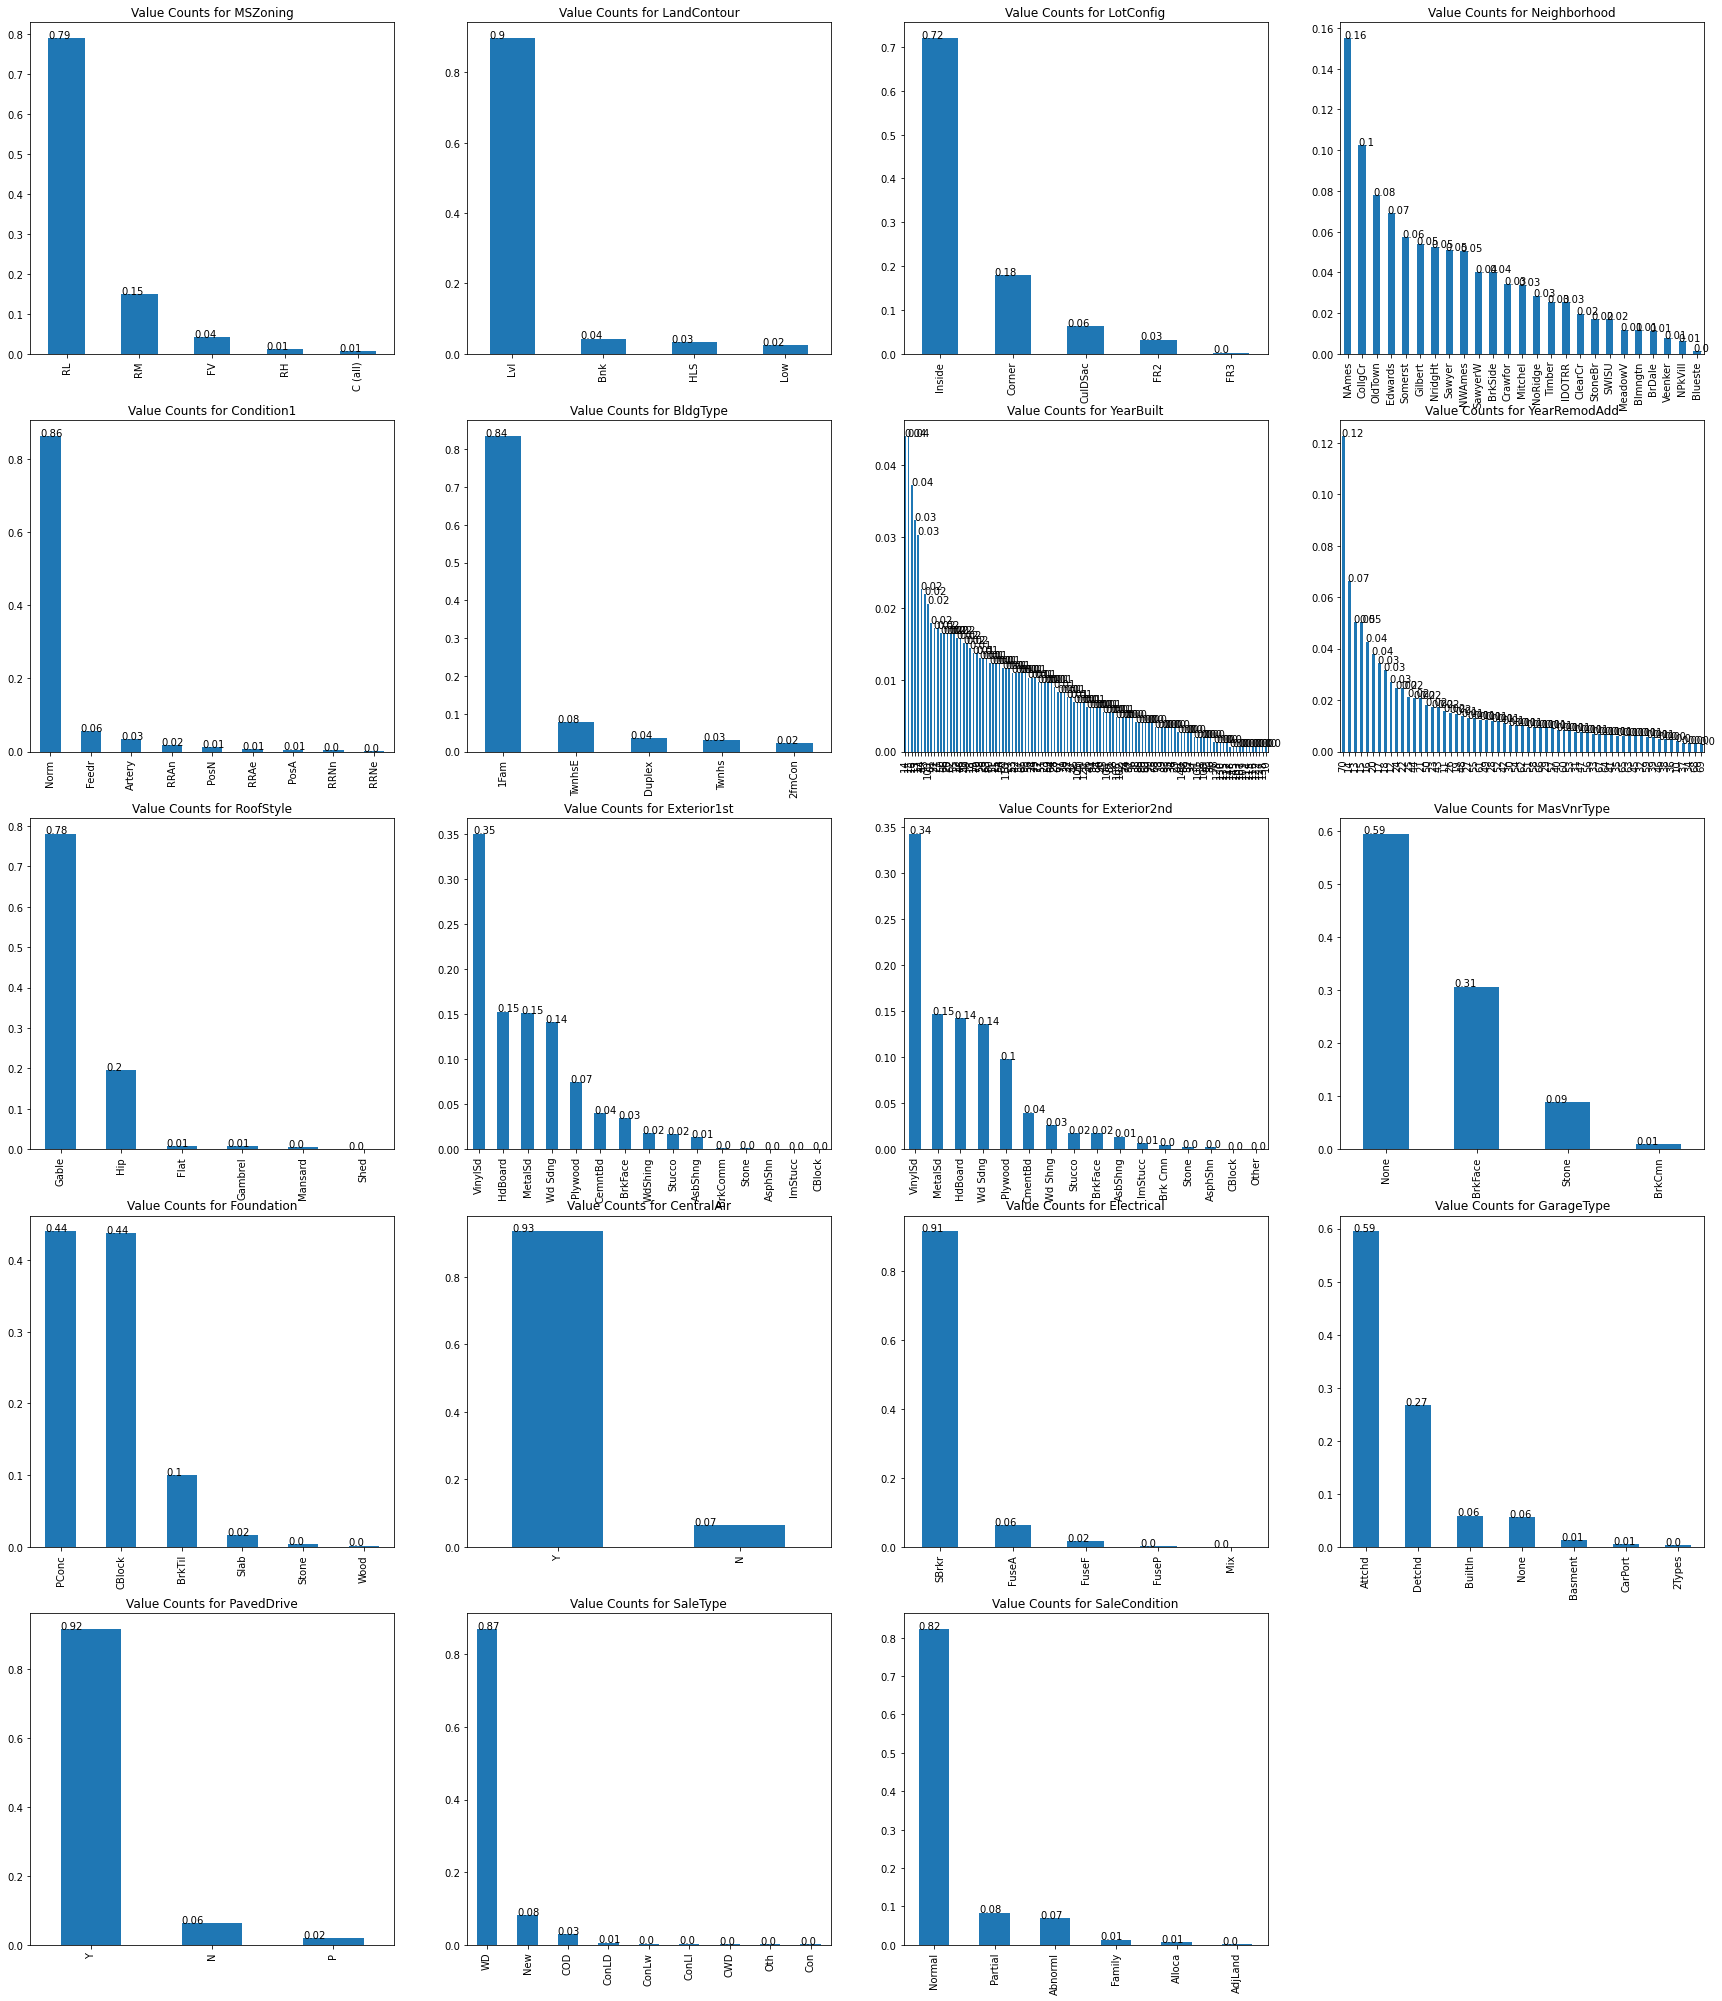

In [60]:
# plotting count plots for all categorical variables

plt.figure(figsize=(30,50))

for i,k in enumerate(remaining_cat_vars):
    plt.subplot(7,4,i+1)
    ax = housing[k].value_counts(normalize=True).plot.bar()
    annotate_bar_graph(ax)
    plt.title('Value Counts for {0}'.format(k))
plt.show()
plt.close()

As we can see there are many categories with less than 5% of data. We will club them and mark them as "Others".

In [61]:
for col in remaining_cat_vars:
    x = pd.DataFrame(housing[col].value_counts(normalize=True))
    x=x.T
    lesser_than_2_per = [i for i in x.columns if x[i].values[0] <= 0.05]
    housing[col] = housing[col].apply(lambda x: 'Others' if x in lesser_than_2_per else x)

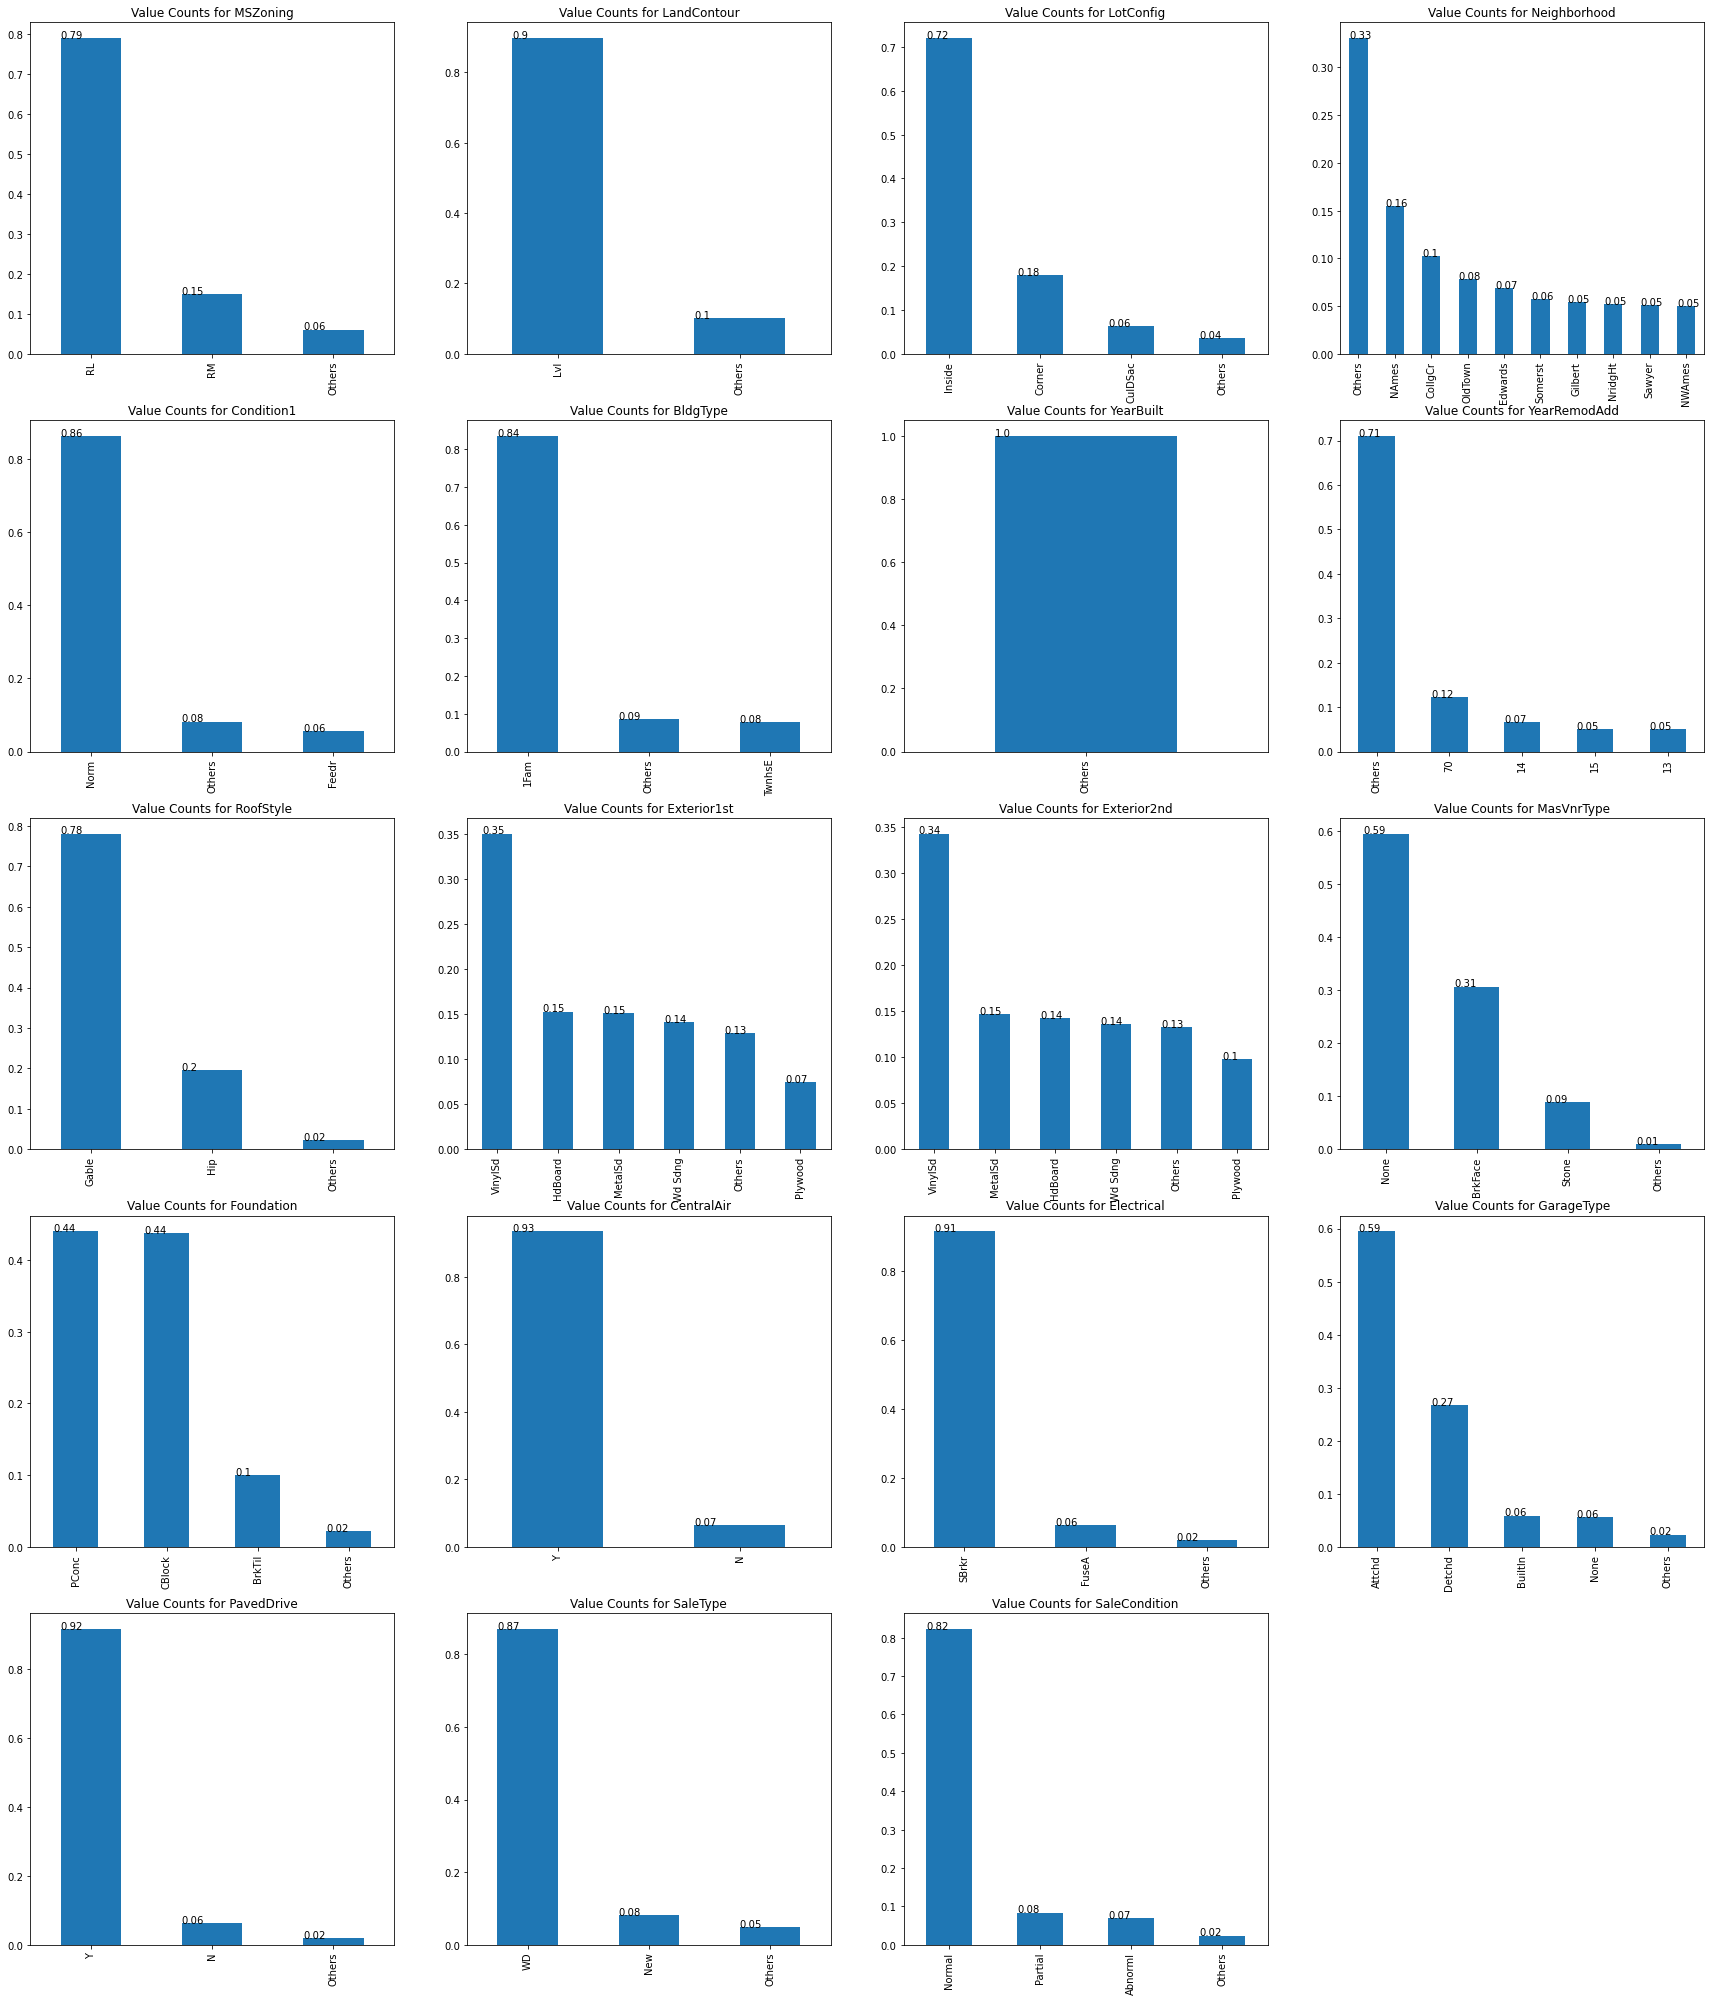

In [62]:
# plotting count plots for all categorical variables

plt.figure(figsize=(30,50))

for i,k in enumerate(remaining_cat_vars):
    plt.subplot(7,4,i+1)
    ax = housing[k].value_counts(normalize=True).plot.bar()
    annotate_bar_graph(ax)
    plt.title('Value Counts for {0}'.format(k))
plt.show()
plt.close()

Below columns have the values more than 90% belonging to one category. Hence we will remove these columns as they will be less influential.
- CentralAir, Electrical, PavedDrive, LandContour.

In [63]:
remove_cols = ['CentralAir','Electrical','PavedDrive','LandContour']
[categorical_vars.remove(i) for i in remove_cols]
[remaining_cat_vars.remove(i) for i in remove_cols]
housing.drop(remove_cols, axis=1, inplace=True)

In [64]:
len(housing.columns)

57

In [65]:
len(categorical_vars)

28

Let us create dummy variables

In [66]:
print(list(housing.columns))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice']


In [67]:
len(remaining_cat_vars)

15

In [68]:
for col in remaining_cat_vars:
    dummy_df = pd.get_dummies(housing[col], prefix=col, drop_first=True)
    housing = pd.concat([housing, dummy_df], axis=1)
    housing.drop([col], axis=1, inplace=True)

housing.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'HouseStyle', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'SalePrice', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_CulDSac', 'LotConfig_Inside',
       'LotConfig_Others', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Others', 'Neighborhood_Sawyer',
       'Neighborhood_Somerst', 'Condition1_N

In [69]:
len(housing.columns)

91

Check the correlation again for all columns against Sale Price and then remove the non related columns.
Remove the columns which have correlation between =-0.05 to 0.05

In [70]:
sale_price_corr = pd.DataFrame(housing.corr()['SalePrice']).T
remove_cols = [i for i in sale_price_corr.columns if -0.05< sale_price_corr[i].values[0] < 0.05]
housing.drop(remove_cols, axis=1, inplace=True)

In [71]:
len(housing.columns)

79

In [72]:
# final list of columns

print(list(housing.columns))

['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'LotConfig_Inside', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Others', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Condition1_Norm', 'BldgType_Others', 'YearRemodAdd_14', 'YearRemodAdd_15', 'YearRemodAdd_70', 'RoofStyle_Hip', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exter

In [73]:
# check for any non numeric columns
y = [col for col in housing.columns if housing[col].dtype=='object']
len(y)

0

Now that we have arrived at the final list of columns. Let us check the skewness of SalePrice column

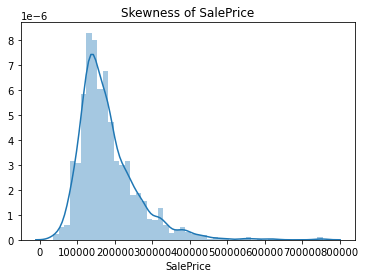

In [74]:
sns.distplot(housing['SalePrice'])
plt.title('Skewness of SalePrice')
plt.show()

As we can see the Sale Price Column in left skewed. Hence we will apply log transform as it works for the left skewed data.

Before applying the log transform let us plot the transformed data first.

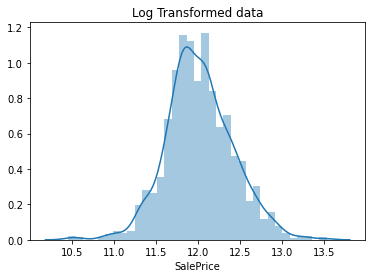

In [75]:
sns.distplot(np.log(housing['SalePrice']))
plt.title('Log Transformed data')
plt.show()

In [76]:
# Transforming the SalePrice Column

housing['SalePrice'] = np.log(housing['SalePrice'])

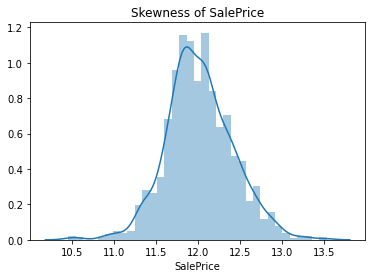

In [77]:
sns.distplot(housing['SalePrice'])
plt.title('Skewness of SalePrice')
plt.show()

### Test Train Split of data

In [78]:
y = housing['SalePrice']
X = housing.drop(['SalePrice'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=100)

In [79]:
X_train.shape, y_train.shape

((1015, 78), (1015,))

In [80]:
X_test.shape, y_test.shape

((436, 78), (436,))

In [81]:
# appending LotFrontage for numeric_cols
numeric_cols.append('LotFrontage')
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

## Data Modelling using Ridge and Lasso

- ### Ridge

In [82]:
# list of alphas to tune

params = {'alpha': np.linspace(0.0,50.0,20)}

ridge = Ridge()

folds=5

ridge_cv = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1, return_train_score=True)
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([ 0.        ,  2.63157895,  5.26315789,  7.89473684, 10.52631579,
       13.15789474, 15.78947368, 18.42105263, 21.05263158, 23.68421053,
       26.31578947, 28.94736842, 31.57894737, 34.21052632, 36.84210526,
       39.47368421, 42.10526316, 44.73684211, 47.36842105, 50.        ])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
cv_results = pd.DataFrame(ridge_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014162,0.004943,0.003989,8.341244e-07,0,{'alpha': 0.0},-0.114187,-0.096162,-0.093870,-0.100579,-0.101320,-0.101223,0.007045,20,-0.076621,-0.092133,-0.092963,-0.092015,-0.092136,-0.089174,0.006286
1,0.013764,0.003645,0.008483,4.882263e-03,2.63158,{'alpha': 2.6315789473684212},-0.110272,-0.094905,-0.093134,-0.098784,-0.099406,-0.099300,0.005966,19,-0.077037,-0.091992,-0.092535,-0.091760,-0.091560,-0.088977,0.005979
2,0.012566,0.003254,0.007780,6.597826e-03,5.26316,{'alpha': 5.2631578947368425},-0.109190,-0.094470,-0.092978,-0.098107,-0.099052,-0.098759,0.005677,18,-0.077206,-0.092012,-0.092461,-0.091765,-0.091441,-0.088977,0.005895
3,0.010972,0.001410,0.006782,5.100801e-03,7.89474,{'alpha': 7.894736842105264},-0.108585,-0.094238,-0.092982,-0.097641,-0.098972,-0.098484,0.005501,17,-0.077377,-0.092097,-0.092449,-0.091822,-0.091528,-0.089055,0.005847
4,0.015558,0.005374,0.004388,4.887734e-04,10.5263,{'alpha': 10.526315789473685},-0.108145,-0.094048,-0.093059,-0.097239,-0.098910,-0.098280,0.005366,12,-0.077552,-0.092234,-0.092453,-0.091902,-0.091658,-0.089160,0.005810


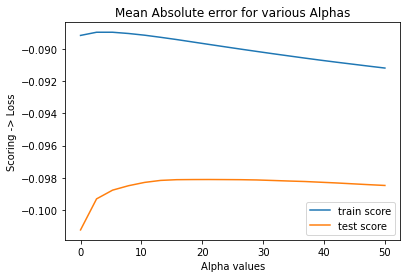

In [84]:
# plotting the score of train and test with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('Alpha values')
plt.ylabel('Scoring -> Loss')
plt.title('Mean Absolute error for various Alphas')
plt.legend(['train score', 'test score'], loc='bottom')
plt.show()

In [85]:
ridge_cv.best_params_

{'alpha': 21.05263157894737}

In [86]:
ridge_cv.best_score_

-0.09810068292484429

In [87]:
# r2_score for train

y_train_pred = ridge_cv.best_estimator_.predict(X_train)
metrics.r2_score(y_train_pred,y_train)

0.8739098960897872

In [88]:
# r2_score for test

y_test_pred_1 = ridge_cv.best_estimator_.predict(X_test)
metrics.r2_score(y_test_pred_1, y_test)

0.8805707326389502

We can see that the best alpha value is 20.0
Let us re run the gridsearch with alpha values around 20.0

In [89]:
# list of alphas to tune

params = {'alpha': np.linspace(ridge_cv.best_params_['alpha']-5, ridge_cv.best_params_['alpha']+20, 20)}

ridge = Ridge()

folds=5

ridge_cv = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1, return_train_score=True)
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([16.05263158, 17.36842105, 18.68421053, 20.        , 21.31578947,
       22.63157895, 23.94736842, 25.26315789, 26.57894737, 27.89473684,
       29.21052632, 30.52631579, 31.84210526, 33.15789474, 34.47368421,
       35.78947368, 37.10526316, 38.42105263, 39.73684211, 41.05263158])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
cv_results = pd.DataFrame(ridge_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011568,0.003064,0.006184,0.001466,16.0526,{'alpha': 16.05263157894737},-0.107606,-0.093942,-0.093234,-0.096670,-0.099096,-0.098110,0.005184,8,-0.077923,-0.092553,-0.092607,-0.092173,-0.091968,-0.089445,0.005766
1,0.013364,0.004745,0.004787,0.001163,17.3684,{'alpha': 17.368421052631582},-0.107553,-0.093958,-0.093285,-0.096585,-0.099147,-0.098105,0.005159,5,-0.078006,-0.092629,-0.092666,-0.092248,-0.092051,-0.089520,0.005762
2,0.009973,0.001410,0.005783,0.002130,18.6842,{'alpha': 18.68421052631579},-0.107510,-0.093977,-0.093334,-0.096503,-0.099193,-0.098103,0.005138,3,-0.078092,-0.092704,-0.092723,-0.092321,-0.092131,-0.089594,0.005756
3,0.010572,0.002239,0.004189,0.000399,20,{'alpha': 20.0},-0.107470,-0.094005,-0.093382,-0.096421,-0.099234,-0.098102,0.005117,2,-0.078174,-0.092780,-0.092782,-0.092398,-0.092208,-0.089668,0.005752
4,0.009174,0.001162,0.004388,0.000798,21.3158,{'alpha': 21.315789473684212},-0.107433,-0.094033,-0.093425,-0.096338,-0.099272,-0.098100,0.005098,1,-0.078258,-0.092851,-0.092839,-0.092486,-0.092283,-0.089743,0.005747


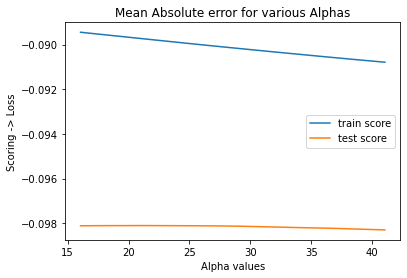

In [91]:
# plotting the score of train and test with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('Alpha values')
plt.ylabel('Scoring -> Loss')
plt.title('Mean Absolute error for various Alphas')
plt.legend(['train score', 'test score'], loc='bottom')
plt.show()

In [92]:
ridge_cv.best_score_

-0.09810008830192592

In [93]:
ridge_cv.best_params_

{'alpha': 21.315789473684212}

In [94]:
# r2_score for train

y_train_pred = ridge_cv.best_estimator_.predict(X_train)
metrics.r2_score(y_train_pred,y_train)

0.8738317121242862

In [95]:
# r2_score for test

y_test_pred_2 = ridge_cv.best_estimator_.predict(X_test)
metrics.r2_score(y_test_pred_2, y_test)

0.8805765067643622

After seeing the second round of GridSearchCV results we decided to take the ideal value of alpha as 21.315789473684212.

Let us build the ridge model with alpha = 20.0

In [96]:
# alpha=21.315789473684212

ridge = Ridge(alpha=21.315789473684212)
ridge.fit(X_train,y_train)

Ridge(alpha=21.315789473684212)

In [97]:
# r2_score for train

y_train_pred = ridge.predict(X_train)
metrics.r2_score(y_train_pred,y_train)

0.8738317121242862

In [98]:
# r2_score for test

y_test_pred = ridge.predict(X_test)
metrics.r2_score(y_test_pred,y_test)

0.8805765067643622

In [99]:
var_imp_df_ridge = pd.DataFrame(ridge.coef_).T
var_imp_df_ridge.columns=X_train.columns

In [100]:
len(var_imp_df_ridge.columns)

78

In [101]:
# Sort variables based on importance from high to low
var_imp_df_ridge = var_imp_df_ridge.T
var_imp_df_ridge.columns=['values']
var_imp_df_ridge.sort_values(by='values', ascending=False, inplace=True)
var_imp_df_ridge

,values
OverallQual,9.585901e-02
Neighborhood_NridgHt,6.750977e-02
Neighborhood_Somerst,6.423012e-02
Condition1_Norm,6.353282e-02
SaleCondition_Normal,5.932394e-02
1stFlrSF,5.834086e-02
GarageCars,5.453828e-02
BsmtFullBath,4.923102e-02
SaleCondition_Partial,4.803924e-02
GrLivArea,4.653220e-02


Above dataframe tells us the **78 variables** that are important for prediction in Ridge Regression model and also the importance of each prediction with alpha value **21.315789473684212**.

### Lasso

In [102]:
# list of alphas to tune

params = {'alpha': np.linspace(0.0,0.05,90)}

lasso = Lasso()

folds=5

lasso_cv = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1, return_train_score=True)
lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    3.0s finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.        , 0.0005618 , 0.0011236 , 0.00168539, 0.00224719,
       0.00280899, 0.00337079, 0.00393258, 0.00449438, 0.00505618,
       0.00561798, 0.00617978, 0.00674157, 0.00730337, 0.00786517,
       0.00842697, 0.00898876, 0.00955056, 0.01011236, 0.01067416,
       0.01123596, 0.01179775, 0.01235955, 0.01292135, 0.01348315,
       0.01404494, 0...
       0.03370787, 0.03426966, 0.03483146, 0.03539326, 0.03595506,
       0.03651685, 0.03707865, 0.03764045, 0.03820225, 0.03876404,
       0.03932584, 0.03988764, 0.04044944, 0.04101124, 0.04157303,
       0.04213483, 0.04269663, 0.04325843, 0.04382022, 0.04438202,
       0.04494382, 0.04550562, 0.04606742, 0.04662921, 0.04719101,
       0.04775281, 0.04831461, 0.0488764 , 0.0494382 , 0.05      ])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [103]:
cv_results = pd.DataFrame(lasso_cv.cv_results_)

In [104]:
np.log(list(cv_results['param_alpha']))

array([       -inf, -7.48436864, -6.79122146, -6.38575635, -6.09807428,
       -5.87493073, -5.69260917, -5.53845849, -5.4049271 , -5.28714407,
       -5.18178355, -5.08647337, -4.99946199, -4.91941929, -4.84531131,
       -4.77631844, -4.71177992, -4.6511553 , -4.59399689, -4.53992966,
       -4.48863637, -4.43984621, -4.39332619, -4.34887443, -4.30631481,
       -4.26549282, -4.22627211, -4.18853178, -4.15216413, -4.11707281,
       -4.08317126, -4.05038144, -4.01863274, -3.98786108, -3.95800812,
       -3.92902058, -3.9008497 , -3.87345073, -3.84678248, -3.820807  ,
       -3.79548919, -3.77079658, -3.74669903, -3.72316853, -3.70017901,
       -3.67770615, -3.65572725, -3.63422104, -3.61316763, -3.59254835,
       -3.57234564, -3.55254301, -3.53312492, -3.51407673, -3.4953846 ,
       -3.47703546, -3.45901695, -3.44131738, -3.42392563, -3.4068312 ,
       -3.39002408, -3.37349478, -3.35723426, -3.34123392, -3.32548556,
       -3.30998137, -3.2947139 , -3.27967602, -3.26486094, -3.25

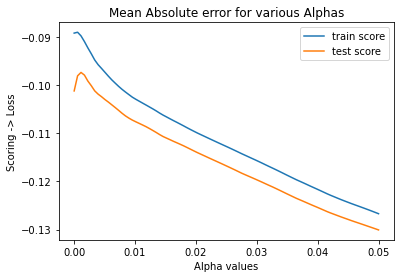

In [105]:
# plotting the score of train and test with alpha

plt.plot(((cv_results['param_alpha'])), cv_results['mean_train_score'])
plt.plot(((cv_results['param_alpha'])), cv_results['mean_test_score'])

plt.xlabel('Alpha values')
plt.ylabel('Scoring -> Loss')
plt.title('Mean Absolute error for various Alphas')
plt.legend(['train score', 'test score'], loc='bottom')
plt.show()

In [106]:
lasso_cv.best_score_

-0.09734270671276402

In [107]:
lasso_cv.best_params_

{'alpha': 0.0011235955056179776}

Let us see the r2 scores for train and test

In [108]:
# r2_score for train

y_train_pred = lasso_cv.best_estimator_.predict(X_train)
metrics.r2_score(y_train_pred,y_train)

0.8705853825242426

In [109]:
# r2_score for test

y_test_pred = lasso_cv.best_estimator_.predict(X_test)
metrics.r2_score(y_test_pred,y_test)

0.8810482854230968

Let us finetune the grid search with alpha values near to 0.001

In [110]:
lasso_cv.best_params_['alpha']

0.0011235955056179776

In [111]:
# list of alphas to tune

params = {'alpha': np.linspace(lasso_cv.best_params_['alpha']-0.005, lasso_cv.best_params_['alpha']+0.0020, 25)}

lasso = Lasso()

folds=5

lasso_cv = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1, return_train_score=True)
lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.5s finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([-3.87640449e-03, -3.58473783e-03, -3.29307116e-03, -3.00140449e-03,
       -2.70973783e-03, -2.41807116e-03, -2.12640449e-03, -1.83473783e-03,
       -1.54307116e-03, -1.25140449e-03, -9.59737828e-04, -6.68071161e-04,
       -3.76404494e-04, -8.47378277e-05,  2.06928839e-04,  4.98595506e-04,
        7.90262172e-04,  1.08192884e-03,  1.37359551e-03,  1.66526217e-03,
        1.95692884e-03,  2.24859551e-03,  2.54026217e-03,  2.83192884e-03,
        3.12359551e-03])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
cv_results = pd.DataFrame(lasso_cv.cv_results_)

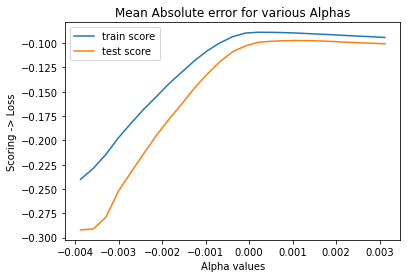

In [113]:
# plotting the score of train and test with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('Alpha values')
plt.ylabel('Scoring -> Loss')
plt.title('Mean Absolute error for various Alphas')
plt.legend(['train score', 'test score'], loc='bottom')
plt.show()

In [114]:
lasso_cv.best_score_

-0.0973462906774754

In [115]:
lasso_cv.best_params_

{'alpha': 0.0010819288389513114}

Let us see the r2 scores for train and test

In [116]:
# r2_score for train

y_train_pred = lasso_cv.best_estimator_.predict(X_train)
metrics.r2_score(y_train_pred,y_train)

0.8710129363197379

In [117]:
# r2_score for test

y_test_pred = lasso_cv.best_estimator_.predict(X_test)
metrics.r2_score(y_test_pred,y_test)

0.8810536793198064

After analyzing the test scores for 2 different alphas, we decided to go with alpha value 0.0010819288389513114.

Let us see the variable importances

In [118]:
# alpha=0.0010819288389513114

lasso = Lasso(alpha=0.0010819288389513114)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0010819288389513114)

In [119]:
# r2_score for train

y_train_pred = lasso.predict(X_train)
metrics.r2_score(y_train_pred,y_train)

0.8710129363197379

In [120]:
# r2_score for test

y_test_pred = lasso.predict(X_test)
metrics.r2_score(y_test_pred,y_test)

0.8810536793198064

In [121]:
var_imp_lasso_df = pd.DataFrame(lasso.coef_).T
var_imp_lasso_df.columns = X_train.columns
var_imp_lasso_df

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Norm,BldgType_Others,YearRemodAdd_14,YearRemodAdd_15,YearRemodAdd_70,RoofStyle_Hip,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Others,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Others,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,-0.019018,-0.010016,0.000002,0.0,0.0,-0.005648,0.101875,0.042142,0.0,0.000574,0.024596,0.0,0.016495,0.013525,-0.002531,-0.000002,-0.008189,0.023194,0.084004,0.000153,0.012924,0.049515,0.014689,0.02862,0.020829,-0.0,0.022027,0.013111,0.0,0.013874,-0.000192,0.012517,0.053218,-0.001019,0.014412,0.0,0.008757,-0.000831,0.003342,0.014244,0.066936,-0.020839,0.033289,-0.008801,-0.058703,0.0,0.074603,-0.01907,0.007144,-0.0,0.083697,0.068326,-0.0,0.0,-0.0,-0.024312,0.010347,0.015261,0.017465,-0.014511,0.0,0.01688,0.0,0.0,-0.0,-0.0,0.0,0.0,0.030431,-0.0,-0.017607,0.0,-0.001588,-0.0,-0.0,0.053232,0.002343,0.071783


In [122]:
[var_imp_lasso_df.drop(i, axis=1, inplace=True) for i in var_imp_lasso_df.columns if var_imp_lasso_df[i].values[0] == 0.0]
print('Removing the columns which has value 0..')

Removing the columns which has value 0..


In [123]:
len(var_imp_lasso_df.columns)

55

In [124]:
# Sort variables based on importance from high to low
var_imp_lasso_df = var_imp_lasso_df.T
var_imp_lasso_df.columns=['values']
var_imp_lasso_df.sort_values(by='values', ascending=False, inplace=True)
var_imp_lasso_df

,values
OverallQual,0.101875
1stFlrSF,0.084004
Neighborhood_Somerst,0.083697
Neighborhood_NridgHt,0.074603
SaleCondition_Partial,0.071783
Condition1_Norm,0.068326
MSZoning_RL,0.066936
SaleCondition_Normal,0.053232
GarageCars,0.053218
BsmtFullBath,0.049515


Above dataframe tells us the **55 variables** that are important for prediction in Ridge Regression model and also the importance of each prediction with alpha value **0.0010819288389513114**.

# Subjective Questions

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [125]:
# Ridge double the alpha

alpha_r = ridge.alpha
ridge_2 = Ridge(alpha=2*alpha_r)
ridge_2.fit(X_train, y_train)


Ridge(alpha=42.631578947368425)

In [126]:
# Train Score

y_train_pred = ridge_2.predict(X_train)
metrics.r2_score(y_train_pred, y_train)

0.8682995042431849

In [127]:
# Test Score

y_test_pred = ridge_2.predict(X_test)
metrics.r2_score(y_test_pred, y_test)

0.8802114569069298

In [128]:
var_imp_ridge_2 = pd.DataFrame(ridge_2.coef_).T
var_imp_ridge_2.columns = X_train.columns

In [129]:
var_imp_ridge_2 = var_imp_ridge_2.T
var_imp_ridge_2.columns = ['values']
var_imp_ridge_2.sort_values(ascending=False, by='values', inplace=True)
var_imp_ridge_2

,values
OverallQual,0.092961
Condition1_Norm,0.054705
1stFlrSF,0.053274
GarageCars,0.050478
Neighborhood_NridgHt,0.047687
Neighborhood_Somerst,0.043884
SaleCondition_Normal,0.042309
BsmtFullBath,0.042005
GrLivArea,0.041415
OverallCond,0.040746


In [130]:
# double alpha value for lasso

alpha_l = lasso.alpha
lasso_2 = Lasso(alpha=2*alpha_l)
lasso_2.fit(X_train, y_train)

Lasso(alpha=0.002163857677902623)

In [131]:
# Train Score

y_train_pred = lasso_2.predict(X_train)
metrics.r2_score(y_train_pred, y_train)

0.8608333769219642

In [132]:
# Test Score

y_test_pred = lasso_2.predict(X_test)
metrics.r2_score(y_test_pred, y_test)

0.8769444265527736

In [133]:
# important predictors

var_imp_lasso_2 = pd.DataFrame(lasso_2.coef_).T
var_imp_lasso_2.columns = X_train.columns
var_imp_lasso_2 = var_imp_lasso_2.T
var_imp_lasso_2.columns=['values']
var_imp_lasso_2.sort_values(ascending=False, by='values', inplace=True)
var_imp_lasso_2

,values
OverallQual,0.106070
1stFlrSF,0.084096
Condition1_Norm,0.060009
GarageCars,0.056875
OverallCond,0.040426
Neighborhood_NridgHt,0.040388
MSZoning_RL,0.040363
BsmtFullBath,0.038376
Neighborhood_Somerst,0.033606
SaleCondition_Partial,0.031847


### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [134]:
print('Alpha value for Ridge is {0} and number of variables are {1}'.format(ridge.alpha, var_imp_df_ridge.shape[0]))
print('Alpha value for Lasso is {0} and number of variables are {1}'.format(lasso.alpha, var_imp_lasso_df.shape[0]))

Alpha value for Ridge is 21.315789473684212 and number of variables are 78
Alpha value for Lasso is 0.0010819288389513114 and number of variables are 55


## Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [135]:
# Remove top 5 vars from X_train and fit Ridge

top_5_ridge = list(var_imp_df_ridge.index[0:5])
X_train_new_r = X_train.copy()
X_test_new_r = X_test.copy()

X_train_new_r.shape, X_test_new_r.shape

((1015, 78), (436, 78))

In [136]:
X_train_new_r.drop(top_5_ridge, axis=1, inplace=True)
X_test_new_r.drop(top_5_ridge, axis=1, inplace=True)

X_train_new_r.shape, X_test_new_r.shape

((1015, 73), (436, 73))

In [137]:
# list of alphas to tune

params = {'alpha': np.linspace(0.0,150.0,200)}

ridge = Ridge()

folds=5

ridge_cv = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1, return_train_score=True)
ridge_cv.fit(X_train_new_r, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.7s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([  0.        ,   0.75376884,   1.50753769,   2.26130653,
         3.01507538,   3.76884422,   4.52261307,   5.27638191,
         6.03015075,   6.7839196 ,   7.53768844,   8.29145729,
         9.04522613,   9.79899497,  10.55276382,  11.30653266,
        12.06030151,  12.81407035,  13.5678392 ,  14.32160804,
        15.07537688,  15.82914573,  16.58291457,  17.33668342,
        18.09045226,  1...
       132.66331658, 133.41708543, 134.17085427, 134.92462312,
       135.67839196, 136.4321608 , 137.18592965, 137.93969849,
       138.69346734, 139.44723618, 140.20100503, 140.95477387,
       141.70854271, 142.46231156, 143.2160804 , 143.96984925,
       144.72361809, 145.47738693, 146.23115578, 146.98492462,
       147.73869347, 148.49246231, 149.24623116, 150.        ])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [138]:
cv_results = pd.DataFrame(ridge_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011369,0.002999,0.004389,0.000489,0,{'alpha': 0.0},-0.124275,-0.108612,-0.108851,-0.104365,-0.115226,-0.112266,0.006934,200,-0.086932,-0.102514,-0.103409,-0.104982,-0.103338,-0.100235,0.006699
1,0.008976,0.000893,0.004388,0.000489,0.753769,{'alpha': 0.7537688442211056},-0.121677,-0.108429,-0.108808,-0.104090,-0.115166,-0.111634,0.006140,199,-0.087417,-0.102483,-0.103415,-0.104992,-0.103237,-0.100309,0.006497
2,0.009574,0.001620,0.004389,0.000489,1.50754,{'alpha': 1.5075376884422111},-0.120716,-0.108356,-0.108736,-0.104014,-0.115068,-0.111378,0.005851,198,-0.087539,-0.102474,-0.103398,-0.104973,-0.103154,-0.100308,0.006437
3,0.008976,0.002523,0.004987,0.000892,2.26131,{'alpha': 2.261306532663317},-0.120036,-0.108331,-0.108665,-0.103968,-0.115017,-0.111203,0.005650,197,-0.087633,-0.102459,-0.103378,-0.104953,-0.103083,-0.100301,0.006387
4,0.007780,0.000399,0.004188,0.000399,3.01508,{'alpha': 3.0150753768844223},-0.119500,-0.108302,-0.108630,-0.103931,-0.114969,-0.111066,0.005493,196,-0.087714,-0.102454,-0.103352,-0.104935,-0.103043,-0.100300,0.006346


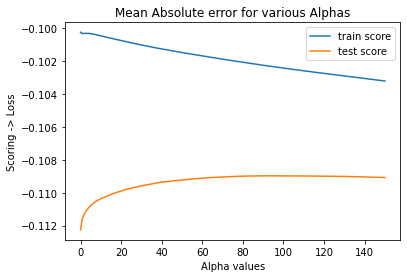

In [139]:
# plotting the score of train and test with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('Alpha values')
plt.ylabel('Scoring -> Loss')
plt.title('Mean Absolute error for various Alphas')
plt.legend(['train score', 'test score'], loc='bottom')
plt.show()

In [140]:
ridge_cv.best_estimator_.alpha

90.45226130653266

In [141]:
ridge_cv.best_score_

-0.10897279555412412

In [142]:
# r2_score for train

y_train_pred = ridge_cv.best_estimator_.predict(X_train_new_r)
metrics.r2_score(y_train_pred,y_train)

0.8267723912837881

In [143]:
# r2_score for test

y_test_pred_1 = ridge_cv.best_estimator_.predict(X_test_new_r)
metrics.r2_score(y_test_pred_1, y_test)

0.8549205554844628

The best value of alpha after removing the top 5 important variables is 90.45226130653266. Train Score is 0.8267 and Test Score is 0.8549

In [144]:
# feature importance
var_imp_ridge_new = pd.DataFrame(ridge_cv.best_estimator_.coef_).T
var_imp_ridge_new.columns = X_train_new_r.columns
var_imp_ridge_new = var_imp_ridge_new.T
var_imp_ridge_new.columns = ['values']
var_imp_ridge_new.sort_values(by='values', ascending=False, inplace=True)
var_imp_ridge_new

,values
1stFlrSF,0.051269
GarageCars,0.051208
OverallCond,0.043154
BsmtQual,0.041274
KitchenQual,0.041155
ExterQual,0.040074
GrLivArea,0.039558
HalfBath,0.032671
MSZoning_RL,0.029723
FullBath,0.028562


In [145]:
print('The new top 5 important features after dropping the earlier top 5 are {0}'.format(list(var_imp_ridge_new.index[0:5])))

The new top 5 important features after dropping the earlier top 5 are ['1stFlrSF', 'GarageCars', 'OverallCond', 'BsmtQual', 'KitchenQual']


In [146]:
# Remove top 5 vars from X_train and fit Lasso

top_5_lasso = list(var_imp_lasso_df.index[0:5])
X_train_new_l = X_train.copy()
X_test_new_l = X_test.copy()

X_train_new_l.shape, X_test_new_l.shape

((1015, 78), (436, 78))

In [147]:
X_train_new_l.drop(list(top_5_lasso), axis=1, inplace=True)
X_test_new_l.drop(list(top_5_lasso), axis=1, inplace=True)

In [148]:
X_train_new_l.shape, X_test_new_l.shape

((1015, 73), (436, 73))

In [149]:
# list of alphas to tune

params = {'alpha': np.linspace(0.0,0.02,100)}

lasso = Lasso()

folds=5

lasso_cv = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1, return_train_score=True)
lasso_cv.fit(X_train_new_l, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.        , 0.00020202, 0.00040404, 0.00060606, 0.00080808,
       0.0010101 , 0.00121212, 0.00141414, 0.00161616, 0.00181818,
       0.0020202 , 0.00222222, 0.00242424, 0.00262626, 0.00282828,
       0.0030303 , 0.00323232, 0.00343434, 0.00363636, 0.00383838,
       0.0040404 , 0.00424242, 0.00444444, 0.00464646, 0.00484848,
       0.00505051, 0.0...
       0.01414141, 0.01434343, 0.01454545, 0.01474747, 0.01494949,
       0.01515152, 0.01535354, 0.01555556, 0.01575758, 0.0159596 ,
       0.01616162, 0.01636364, 0.01656566, 0.01676768, 0.0169697 ,
       0.01717172, 0.01737374, 0.01757576, 0.01777778, 0.0179798 ,
       0.01818182, 0.01838384, 0.01858586, 0.01878788, 0.0189899 ,
       0.01919192, 0.01939394, 0.01959596, 0.01979798, 0.02      ])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [150]:
cv_results = pd.DataFrame(lasso_cv.cv_results_)

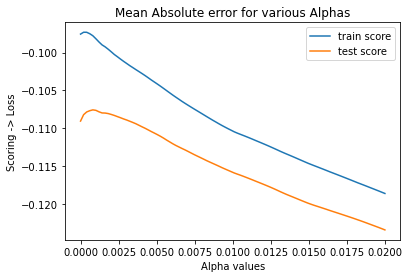

In [151]:
# plotting the score of train and test with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('Alpha values')
plt.ylabel('Scoring -> Loss')
plt.title('Mean Absolute error for various Alphas')
plt.legend(['train score', 'test score'], loc='bottom')
plt.show()

In [152]:
lasso_cv.best_score_

-0.10755593996252148

In [153]:
lasso_cv.best_params_

{'alpha': 0.0008080808080808081}

Let us see the r2 scores for train and test

In [154]:
# r2_score for train

y_train_pred = lasso_cv.best_estimator_.predict(X_train_new_l)
metrics.r2_score(y_train_pred,y_train)

0.8471649999356091

In [155]:
# r2_score for test

y_test_pred = lasso_cv.best_estimator_.predict(X_test_new_l)
metrics.r2_score(y_test_pred,y_test)

0.8594644825012108

The best value of alpha after removing the top 5 important variables is  0.0008080808080808081 and the Test Score is 0.8471, Train Score is 0.8594

In [156]:
# feature importances

var_imp_lasso_new = pd.DataFrame(lasso_cv.best_estimator_.coef_).T
var_imp_lasso_new.columns = X_train_new_l.columns
var_imp_lasso_new = var_imp_lasso_new.T
var_imp_lasso_new.columns = ['values']
var_imp_lasso_new.sort_values(ascending=False, inplace=True, by='values')
var_imp_lasso_new

,values
GrLivArea,0.140180
Condition1_Norm,0.069927
SaleCondition_Normal,0.068674
GarageCars,0.064892
SaleCondition_Others,0.053368
OverallCond,0.047620
BsmtQual,0.044703
KitchenQual,0.044280
BsmtFullBath,0.043063
LotConfig_CulDSac,0.041869


In [157]:
print('The top 5 important features after dropping the previous top 5 for Lasso are {0}'.format(list(var_imp_lasso_new.index[0:5])))

The top 5 important features after dropping the previous top 5 for Lasso are ['GrLivArea', 'Condition1_Norm', 'SaleCondition_Normal', 'GarageCars', 'SaleCondition_Others']
